Análisis exploratorio de datos
============================

Unidad 5-6 - Parte práctica
-----------------------------------------------------



### Ejercicio 1

En este ejercicio vamos a trabajar con el dataset `Food_Inspections.csv`, que podemos encontrar en la carpeta data. Este dataset contiene información sobre inspecciones en diferentes restaurantes y sus resultados.

a) Primero de todo, carga los datos y muestra su tamaño y el nombre de las columnas. Muestra también por pantalla las 5 primeras filas.

b) Comprueba si hay valores nulos (NaNs) en este dataset.

c) Antes de corregir los NaNs, vamos a modificar la columna `Violations` para que sea más fácil de usar. Crea una nueva columna `Violations_category`, que sea 1 cuando haya información en la columna `Violations`, y 0 cuando tenga un NaN.

d) Revisa los valores de la columna City. Es necesaria alguna transformación/corrección?

e) Hay algunos NaNs en la columna City. Usa la columna Zip para encontrar el valor que falta en City. **Opcional**

f) Usa la técnica que te parezca más adecuada para corregir los valores NaNs de la columna Facility type (sin eliminar esas filas).

g) Para simplificar, elimina las otras filas con NaNs después de hacer las correcciones de los apartados c)-f).

In [1]:
# Montamos la unidad Drive para acceder a los archivos de Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Especificamos la ruta hasta la carpeta donde tenemos los archivos de la Unidad 5-6
%cd /content/drive/MyDrive/Colab_Notebooks/Analisis_exploratorio_datos/Unidad5_6

Mounted at /content/drive
/content/drive/MyDrive/Colab_Notebooks/Analisis_exploratorio_datos/Unidad5_6


In [2]:
#a)

# Importamos las librerías necesarias
import pandas as pd
import seaborn as sns
import numpy as np

# Cargamos el archivo csv en un DataFrame
food_df = pd.read_csv("data/Food_Inspections.csv", encoding='utf-8', encoding_errors='replace')

# Mostramos el tamaño del df
print("Tamaño df:\n", food_df.shape)

# Mostramos el nombre de las columnas
print("Columnas del df:\n", food_df.columns)

# Visualizamos las 5 primeras filas con el comando head()
food_df.head(5)

Tamaño df:
 (40355, 16)
Columnas del df:
 Index(['Inspection ID', 'DBA Name', 'License #', 'Facility Type', 'Risk',
       'Address', 'City', 'State', 'Zip', 'Inspection Date', 'Inspection Type',
       'Results', 'Violations', 'Latitude', 'Longitude', 'Location'],
      dtype='object')


,Inspection ID,DBA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,1360950,THE WATERFRONT CAFE,1974239.0,Restaurant,Risk 1 (High),6219 N SHERIDAN RD,CHICAGO,IL,60660.0,09/13/2013,Canvass,Fail,"16. FOOD PROTECTED DURING STORAGE, PREPARATION...",41.995202,-87.655398,"(-87.65539830565382, 41.99520222185558)"
1,1300418,ST. DOROTHY,2225602.0,School,Risk 2 (Medium),7740 S EBERHART,CHICAGO,IL,60619.0,11/09/2012,Canvass,Fail,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.753582,-87.612709,"(-87.61270920896185, 41.753581649965064)"
2,2510664,TACO & BURRITO HOUSE,2646457.0,Restaurant,Risk 1 (High),1548 W FULLERTON AVE,CHICAGO,IL,60614.0,06/02/2021,Canvass,Pass,37. FOOD PROPERLY LABELED; ORIGINAL CONTAINER ...,41.925267,-87.667719,"(-87.66771876385485, 41.92526694366957)"
3,1609430,"GREAT CHINA HOUSE, INC.",2203561.0,Restaurant,Risk 1 (High),2300 S DAMEN AVE,CHICAGO,IL,60608.0,01/07/2016,Canvass,Pass,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",41.850316,-87.675936,"(-87.67593597054196, 41.850315691945504)"
4,229289,NINO PANINO'S INC,86081.0,Restaurant,Risk 1 (High),225 S CANAL ST,CHICAGO,IL,60606.0,03/08/2010,Consultation,Pass,NaN,41.878531,-87.639427,"(-87.63942745962717, 41.878531278353606)"


In [5]:
# b) Miramos si hay NaNs
food_df.isna().sum()

,0
Inspection ID,0
DBA Name,0
License #,0
Facility Type,0
Risk,0
Address,0
City,22
State,0
Zip,5
Inspection Date,0


In [6]:
print("Tamaño df:\n", food_df.shape)

Tamaño df:
 (40355, 16)


In [7]:
# c) Creamos una nueva columna Violations_category

# Inicializamos la columna a 1
food_df['Violations_category'] = 1

# Si el valor en la columna Violations es NaN
# ponemos un 0 en la nueva columna
food_df.loc[food_df.Violations.isna(), 'Violations_category'] = 0

# Comprobamos que los valores son correctos
print("Los valores únicos de la nueva columna son:\n",
      food_df['Violations_category'].unique())

# Mostramos las dos columnas para comparar
food_df[['Violations','Violations_category']]


Los valores únicos de la nueva columna son:
 [1 0]


,Violations,Violations_category
0,"16. FOOD PROTECTED DURING STORAGE, PREPARATION...",1
1,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,1
2,37. FOOD PROPERLY LABELED; ORIGINAL CONTAINER ...,1
3,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",1
4,NaN,0
...,...,...
40350,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",1
40351,NaN,0
40352,NaN,0
40353,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,1


In [8]:
# d) Corregimos valores anómalos columna City

print("Valores únicos de City:\n", food_df['City'].unique())

# Vamos a poner todos los nombres en mayúscula
food_df['City'] = food_df['City'].str.upper()

Valores únicos de City:
 ['CHICAGO' 'Chicago' nan 'chicago' 'CHARLES A HAYES' 'CHICAGOCHICAGO'
 'CCHICAGO' 'CHICAGOI' '312CHICAGO']


In [9]:
# Vemos que CHICAGO está escrito de diferentes maneras
# Vamos a corregirlo

# Creamos un df de City sin NaNs
city_df = food_df.City.dropna()

# Nos quedamos solo con las ciudades que contienen CHICAGO
print("Ciudades que contienen el nombre CHICAGO:\n", city_df[(city_df.str.contains("CHICAGO"))].unique())

food_df['City'] = food_df['City'].replace('CCHICAGO','CHICAGO')
food_df['City'] = food_df['City'].replace('312CHICAGO','CHICAGO')
food_df['City'] = food_df['City'].replace('CHICAGOCHICAGO','CHICAGO')
food_df['City'] = food_df['City'].replace('CHICAGOI','CHICAGO')

print("Valores únicos de City:\n", food_df['City'].unique())

Ciudades que contienen el nombre CHICAGO:
 ['CHICAGO' 'CHICAGOCHICAGO' 'CCHICAGO' 'CHICAGOI' '312CHICAGO']
Valores únicos de City:
 ['CHICAGO' nan 'CHARLES A HAYES']


In [10]:
# g) Corregir los NaNs de la columna City

# Podemos sacar la información de City a partir de Zip

# Creamos un df con la información de City y Zip
city_zip_df = food_df[['City','Zip']].drop_duplicates().dropna()

print("Valores unicos de ZIP:", city_zip_df.Zip.nunique())
print("Tamaño matriz:", city_zip_df.shape)
# Hay ZIPs para más de una ciudad

# Creamos una lista con los zips que tienen NaNs en la columna City
zip_list = list(food_df[(food_df.City.isna())&(~food_df.Zip.isna())]['Zip'].drop_duplicates())

# Miramos el valor de City para esos ZIP
city_zip_df[city_zip_df.Zip.isin(zip_list)].sort_values(by="Zip")

# Vemos que casi todas son Chicago
# 60649 puede ser Chicago o CHARLES A HAYES

Valores unicos de ZIP: 59
Tamaño matriz: (60, 2)


,City,Zip
115,CHICAGO,60610.0
2,CHICAGO,60614.0
65,CHICAGO,60616.0
6,CHICAGO,60620.0
167,CHICAGO,60621.0
32,CHICAGO,60666.0


In [11]:
# Para simplificar, ponemos Chicago a todas
food_df.loc[(food_df.City.isna()), 'City'] = 'CHICAGO'

In [12]:
# f) Corregir los NaNs de la columna Facility Type

# En Facility type hay algunos NaNs
# Podemos sustituirlos por el valor más frecuente

# Calculamos la moda (valor más frecuente) de la columna
# Especificamos 1 decimal
facility_mode = food_df['Facility Type'].mode()[0]

print(f"La moda de la columna Facility Type es {facility_mode}")

# Rellenamos el NaN con el valor de la moda
# Especificamos el inplace = True
food_df['Facility Type'].fillna(facility_mode, inplace=True)

La moda de la columna Facility Type es Restaurant


<ipython-input-12-81e38cd1988f>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  food_df['Facility Type'].fillna(facility_mode, inplace=True)


In [13]:
# Eliminamos filas con NaNs

# Primero de todo, podemos eliminar la columna Violations
# Ya tenemos la información en la nueva columna
food_df.drop(columns='Violations', inplace=True)

# Miramos otra vez los NaNs
food_df.isna().sum()

,0
Inspection ID,0
DBA Name,0
License #,0
Facility Type,0
Risk,0
Address,0
City,0
State,0
Zip,5
Inspection Date,0


In [14]:
# Eliminamos las filas que quedan con NaNs
food_df.dropna(inplace=True)

# Mostramos el tamaño del dataset
print("Tamaño del dataset:\n", food_df.shape)

# Miramos otra vez los NaNs
food_df.isna().sum()

Tamaño del dataset:
 (40239, 16)


,0
Inspection ID,0
DBA Name,0
License #,0
Facility Type,0
Risk,0
Address,0
City,0
State,0
Zip,0
Inspection Date,0


### Ejercicio 2

a) Queremos preparar las columnas `Facility Type`, `Risk` y `Results` para usarlas más tarde en un modelo. Transfórmalas a variables categóricas (nominales, ordinales o binarias) y razona tu procedimiento.

b) Carga el archivo `us_population_income.csv` que se encuentra en la carpeta `data`. Este dataset contiene información demográfica de Estados Unidos. Añade esta información en el dataset que hemos preparado en el apartado a). ¿Qué variable se tiene que usar para combinar ambos datasets?

**Nota**: Para simplificar, nos vamos a quedar con las filas que estan completas en ambos datasets (inner join).

c) Analiza las correlaciones entre las variables:
- Crea una matriz de correlacion de todas las variables numéricas o categóricas (después de modificarlas en al apartado a).
- Haz un estudio de los VIFs. ¿Hay variables muy correlacionadas entre ellas?
- Hay alguna variable correlacionada significativamente (correlación de 0.6 o más) con el salario medio (mean_income)? O con el riesgo?

In [15]:
# a) Transformación de variables categóricas

# Creamos una lista con las columnas
cat_list = ["Facility Type", "Risk", "Results"]

# Ahora vamos a ver los valores únicos de cada una
for n in cat_list:
  print(f"-------{n}-------")
  print("Los valores únicos son:\n",
        food_df[n].unique())
  print("\n")

-------Facility Type-------
Los valores únicos son:
 ['Restaurant' 'School']


-------Risk-------
Los valores únicos son:
 ['Risk 1 (High)' 'Risk 2 (Medium)' 'Risk 3 (Low)']


-------Results-------
Los valores únicos son:
 ['Fail' 'Pass' 'Pass w/ Conditions' 'Out of Business' 'No Entry'
 'Not Ready' 'Business Not Located']




In [16]:
# Facility Type"

# La columna "Facility Type" tiene 2 valores
# por lo tanto, podemos crear una columna binaria
# Por ejemplo, Restaurant = 1, School = 0

# Inicializamos la columna a 0
food_df['Facility_Type_Cat'] = 0

# Cuando el valor sea Restaurant, ponemos un 1
food_df.loc[food_df['Facility Type']=='Restaurant', 'Facility_Type_Cat'] = 1

In [17]:
# Risk

# Risk tiene 3 valores: High, Medium y Low
# podemos representarlos como una categoría ordinal,
# ya que hay un orden

# Low 1, Medium 2, High 3

# Inicializamos la columna a 1
food_df['Risk_Cat'] = 1

# Cuando el valor sea Medium, ponemos un 2
food_df.loc[food_df['Risk']=='Risk 2 (Medium)', 'Risk_Cat'] = 2

# Cuando el valor sea High, ponemos un 3
food_df.loc[food_df['Risk']=='Risk 1 (High)', 'Risk_Cat'] = 3

In [18]:
# Results

# Mostramos como se organizan los resultados
print(food_df.groupby('Results')['Inspection ID'].count().sort_values(ascending=False))
# En este caso, hay 7 categorías, que podemos representar
# como una categoría nominal

# Crearemos pues una columna para cada categoría,
# que indicará con un 1 si el valor de Results pertenece a esa categoría o no

# Vamos a usar la función get_dummies
# Creamos otro df para guardar las columnas nuevas
food_preproc_df = pd.get_dummies(food_df, columns=['Results'], prefix='Results')

# Mostramos las 3 primeras filas
food_preproc_df.head(3)

Results
Pass                    21329
Fail                     7594
Pass w/ Conditions       6583
Out of Business          2699
No Entry                 1626
Not Ready                 401
Business Not Located        7
Name: Inspection ID, dtype: int64


,Inspection ID,DBA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,...,Violations_category,Facility_Type_Cat,Risk_Cat,Results_Business Not Located,Results_Fail,Results_No Entry,Results_Not Ready,Results_Out of Business,Results_Pass,Results_Pass w/ Conditions
0,1360950,THE WATERFRONT CAFE,1974239.0,Restaurant,Risk 1 (High),6219 N SHERIDAN RD,CHICAGO,IL,60660.0,09/13/2013,...,1,1,3,False,True,False,False,False,False,False
1,1300418,ST. DOROTHY,2225602.0,School,Risk 2 (Medium),7740 S EBERHART,CHICAGO,IL,60619.0,11/09/2012,...,1,0,2,False,True,False,False,False,False,False
2,2510664,TACO & BURRITO HOUSE,2646457.0,Restaurant,Risk 1 (High),1548 W FULLERTON AVE,CHICAGO,IL,60614.0,06/02/2021,...,1,1,3,False,False,False,False,False,True,False


In [19]:
# b) Combinar dataset de datos demográficos con dataset food_preproc_df

# Cargamos el nuevo df
pop_income_df = pd.read_csv("data/us_population_income.csv", encoding='utf-8', encoding_errors='replace')

# Mostramos las 5 primeras filas
pop_income_df.head()

,Zip_Code,population,minimum_age,maximum_age,mean_income,sum_households,area_land
0,60644,1301,40.0,44.0,42664,217.927259,688029
1,60618,963,18.0,19.0,123393,188.453281,162818
2,60653,782,45.0,49.0,74365,87.861549,215130
3,60642,280,5.0,9.0,89382,270.919028,293931
4,60614,535,67.0,69.0,62394,658.859555,69094


In [20]:
# Hay algún NaN
pop_income_df.isna().sum()

# Lo sustituímos por la media de la columna


# Calculamos la media de la columna
# Especificamos 1 decimal
min_age = np.round(pop_income_df['minimum_age'].mean(),1)
max_age = np.round(pop_income_df['maximum_age'].mean(),1)

# Rellenamos el NaN con el valor de la media
# Especificamos el inplace = True
pop_income_df['minimum_age'].fillna(min_age, inplace=True)
pop_income_df['maximum_age'].fillna(max_age, inplace=True)

<ipython-input-20-4caf7f709d31>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pop_income_df['minimum_age'].fillna(min_age, inplace=True)
<ipython-input-20-4caf7f709d31>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [21]:
# Ya no hay NaNs
pop_income_df.isna().sum()

,0
Zip_Code,0
population,0
minimum_age,0
maximum_age,0
mean_income,0
sum_households,0
area_land,0


In [22]:
# Ahora vamos a juntar este dataframe con el df del ejercicio anterior
# Como key comuna tienen el zip code

# Si no especificamos nada, se hace un inner join (solo los registros comunes)
food_demo_df = food_preproc_df.merge(pop_income_df, left_on='Zip', right_on='Zip_Code')
food_demo_df.head(3)

,Inspection ID,DBA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,...,Results_Out of Business,Results_Pass,Results_Pass w/ Conditions,Zip_Code,population,minimum_age,maximum_age,mean_income,sum_households,area_land
0,1360950,THE WATERFRONT CAFE,1974239.0,Restaurant,Risk 1 (High),6219 N SHERIDAN RD,CHICAGO,IL,60660.0,09/13/2013,...,False,False,False,60660,469,70.0,74.0,84568,1263.904845,666198
1,1300418,ST. DOROTHY,2225602.0,School,Risk 2 (Medium),7740 S EBERHART,CHICAGO,IL,60619.0,11/09/2012,...,False,False,False,60619,1018,22.0,24.0,41819,586.573533,531538
2,2510664,TACO & BURRITO HOUSE,2646457.0,Restaurant,Risk 1 (High),1548 W FULLERTON AVE,CHICAGO,IL,60614.0,06/02/2021,...,False,True,False,60614,535,67.0,69.0,62394,658.859555,69094


In [23]:
# Mostramos el tamaño de los df
print("Tamaño del dataset inicial", food_preproc_df.shape)
print("Tamaño del dataset final", food_demo_df.shape)

Tamaño del dataset inicial (40239, 24)
Tamaño del dataset final (33995, 31)


In [24]:
# Mostramos las columnas del nuevo df
food_demo_df.columns

Index(['Inspection ID', 'DBA Name', 'License #', 'Facility Type', 'Risk',
       'Address', 'City', 'State', 'Zip', 'Inspection Date', 'Inspection Type',
       'Latitude', 'Longitude', 'Location', 'Violations_category',
       'Facility_Type_Cat', 'Risk_Cat', 'Results_Business Not Located',
       'Results_Fail', 'Results_No Entry', 'Results_Not Ready',
       'Results_Out of Business', 'Results_Pass', 'Results_Pass w/ Conditions',
       'Zip_Code', 'population', 'minimum_age', 'maximum_age', 'mean_income',
       'sum_households', 'area_land'],
      dtype='object')

In [25]:
# Mostramos las primeras filas del nuevo df
food_demo_df.head()

,Inspection ID,DBA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,...,Results_Out of Business,Results_Pass,Results_Pass w/ Conditions,Zip_Code,population,minimum_age,maximum_age,mean_income,sum_households,area_land
0,1360950,THE WATERFRONT CAFE,1974239.0,Restaurant,Risk 1 (High),6219 N SHERIDAN RD,CHICAGO,IL,60660.0,09/13/2013,...,False,False,False,60660,469,70.0,74.0,84568,1263.904845,666198
1,1300418,ST. DOROTHY,2225602.0,School,Risk 2 (Medium),7740 S EBERHART,CHICAGO,IL,60619.0,11/09/2012,...,False,False,False,60619,1018,22.0,24.0,41819,586.573533,531538
2,2510664,TACO & BURRITO HOUSE,2646457.0,Restaurant,Risk 1 (High),1548 W FULLERTON AVE,CHICAGO,IL,60614.0,06/02/2021,...,False,True,False,60614,535,67.0,69.0,62394,658.859555,69094
3,1609430,"GREAT CHINA HOUSE, INC.",2203561.0,Restaurant,Risk 1 (High),2300 S DAMEN AVE,CHICAGO,IL,60608.0,01/07/2016,...,False,True,False,60608,1661,55.0,59.0,67450,612241.922964,588808396
4,1099145,ESSENCE OF INDIA,1495003.0,Restaurant,Risk 1 (High),4601 N LINCOLN AVE,CHICAGO,IL,60625.0,08/15/2013,...,False,True,False,60625,432,65.0,66.0,76843,1075.472170,1903565


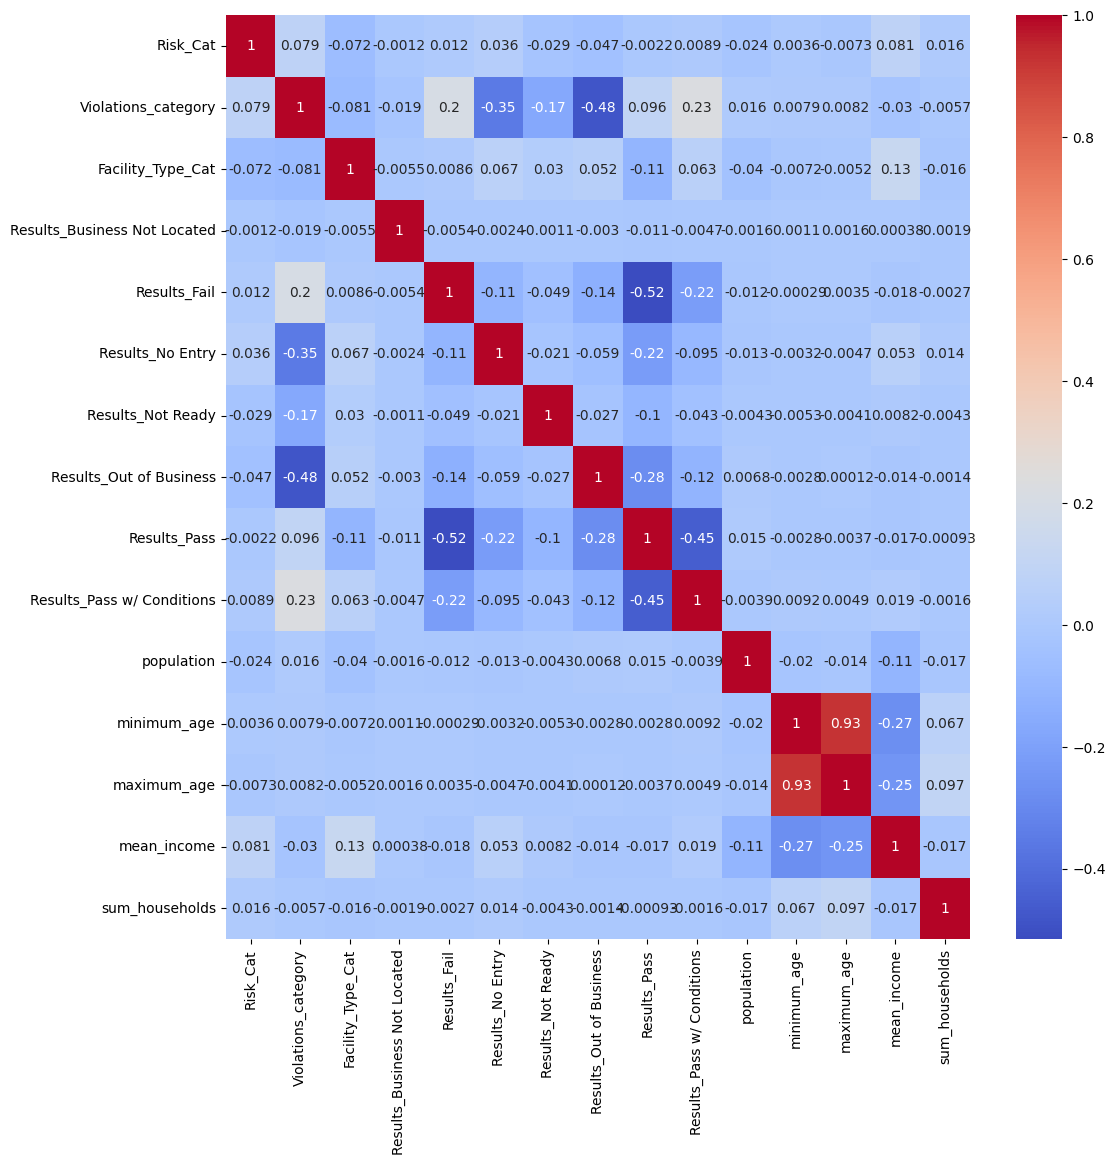

In [26]:
# c) Estudio de correlaciones

# Vamos a mirar ahora las correlaciones entre las variables

# 1. Matriz de correlación

# Cargamos las librerías necesarias
import seaborn as sns
import matplotlib.pyplot as plt

var_corr_all = ['Risk_Cat', 'Violations_category',
       'Facility_Type_Cat', 'Results_Business Not Located',
       'Results_Fail', 'Results_No Entry', 'Results_Not Ready',
       'Results_Out of Business', 'Results_Pass', 'Results_Pass w/ Conditions',
        'population', 'minimum_age', 'maximum_age', 'mean_income', 'sum_households']

# Calculamos la matriz de correlación
correlation_matrix = food_demo_df[var_corr_all].corr()

# Hacemos el gráfico con heatmap
plt.figure(figsize = (12,12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

In [30]:
# Tenemos que convertir los booleanos a enteros
# Seleccionamos las columnas de booleanos
bool_cols = ['Results_Business Not Located',
       'Results_Fail', 'Results_No Entry', 'Results_Not Ready',
       'Results_Out of Business', 'Results_Pass', 'Results_Pass w/ Conditions']

# Aplicamos la transformación
food_demo_df[bool_cols] = food_demo_df[bool_cols].astype(int)

In [31]:
# 2. VIF

# Cargamos las librerías necesarias
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# No incluímos en el análisis las variables categóricas y la dependiente ('mean_income')
var_corr = ['Risk_Cat', 'Violations_category',
       'Facility_Type_Cat', 'Results_Business Not Located',
       'Results_Fail', 'Results_No Entry', 'Results_Not Ready',
       'Results_Out of Business', 'Results_Pass', 'Results_Pass w/ Conditions',
        'population', 'minimum_age', 'maximum_age', 'sum_households']

# Suponemos que queremos hacer un modelo para el income
X = add_constant(food_demo_df[var_corr])  # Agregar constante si es necesario
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                        Variable       VIF
0                          const  0.000000
1                       Risk_Cat  1.017826
2            Violations_category  1.824625
3              Facility_Type_Cat  1.026930
4   Results_Business Not Located       inf
5                   Results_Fail       inf
6               Results_No Entry       inf
7              Results_Not Ready       inf
8        Results_Out of Business       inf
9                   Results_Pass       inf
10    Results_Pass w/ Conditions       inf
11                    population  1.003963
12                   minimum_age  7.099384
13                   maximum_age  7.133328
14                sum_households  1.014361


In [32]:
# No incluímos en el análisis las variables categóricas y la dependiente ('mean_income')
# Ni una de las combinaciones de Results (para evitar tener una correlación perfecta)
var_corr = ['Risk_Cat', 'Violations_category',
       'Facility_Type_Cat', 'Results_Business Not Located',
       'Results_Fail', 'Results_No Entry', 'Results_Not Ready',
       'Results_Out of Business', 'Results_Pass',
        'population', 'minimum_age', 'maximum_age', 'sum_households']

# Suponemos que queremos hacer un modelo para el income
X = add_constant(food_demo_df[var_corr])  # Agregar constante si es necesario
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                        Variable        VIF
0                          const  75.019213
1                       Risk_Cat   1.017826
2            Violations_category   1.824625
3              Facility_Type_Cat   1.026930
4   Results_Business Not Located   1.001836
5                   Results_Fail   1.801135
6               Results_No Entry   1.584552
7              Results_Not Ready   1.137661
8        Results_Out of Business   1.945786
9                   Results_Pass   2.143066
10                    population   1.003963
11                   minimum_age   7.099384
12                   maximum_age   7.133328
13                sum_households   1.014361


In [33]:
# Calculamos la matriz de correlación
correlation_matrix = food_demo_df[var_corr_all].corr()

# Mostramos el resultado de las correlaciones
print("Correlaciones con mean income", correlation_matrix['mean_income'].sort_values(ascending=False))
print("Correlaciones con la categoría de Risk", correlation_matrix['Risk_Cat'].sort_values(ascending=False))

Correlaciones con mean income mean_income                     1.000000
Facility_Type_Cat               0.125705
Risk_Cat                        0.080841
Results_No Entry                0.053252
Results_Pass w/ Conditions      0.019440
Results_Not Ready               0.008163
Results_Business Not Located    0.000383
Results_Out of Business        -0.013547
sum_households                 -0.016576
Results_Pass                   -0.016958
Results_Fail                   -0.017663
Violations_category            -0.029762
population                     -0.112483
maximum_age                    -0.254079
minimum_age                    -0.272945
Name: mean_income, dtype: float64
Correlaciones con la categoría de Risk Risk_Cat                        1.000000
mean_income                     0.080841
Violations_category             0.078927
Results_No Entry                0.036239
sum_households                  0.015592
Results_Fail                    0.012432
Results_Pass w/ Conditions      0.00